## LEAD SCORING CASE STUDY 

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals 
Goals of the Case Study
There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

 ### STEPS INVOLVED 
     a) Read and understand data  
     b) Clean the data 
     c) Prepare the data for modelling. 
     d) Model Building 
     e) Model Evaluation 
     f) Making Predictions on test set
     g) Conclusion and summary


In [1]:
#Importing libararies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
# Loading data 
df = pd.read_csv("Leads.csv")

In [3]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# shape 
df.shape

(9240, 37)

In [5]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# checking columns 
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Data Cleaning

In [8]:
#Checking null values 
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Lets check the percentage 
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# listing columns which are nulls 
cols_with_select_value = [i for i in df.columns if len(df[i].isin(["Select"]).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [11]:
# Replacing select value by nan in df
df = df.replace("Select",np.nan)

In [12]:
# Checking Null percent
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Dropping all the columns with more than 40 % missing values 
for col in df.columns:
    if round(100*(df[col].isnull().sum()/df.shape[0]),2) > 40.00:
        df.drop(col,1,inplace = True)
        

In [14]:
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# checking shape after dropping the columns 
df.shape

(9240, 30)

## EDA -Data Visualisation

### Categorical Variables - Univariate analysis

Text(0.5, 1.0, 'Lead Source')

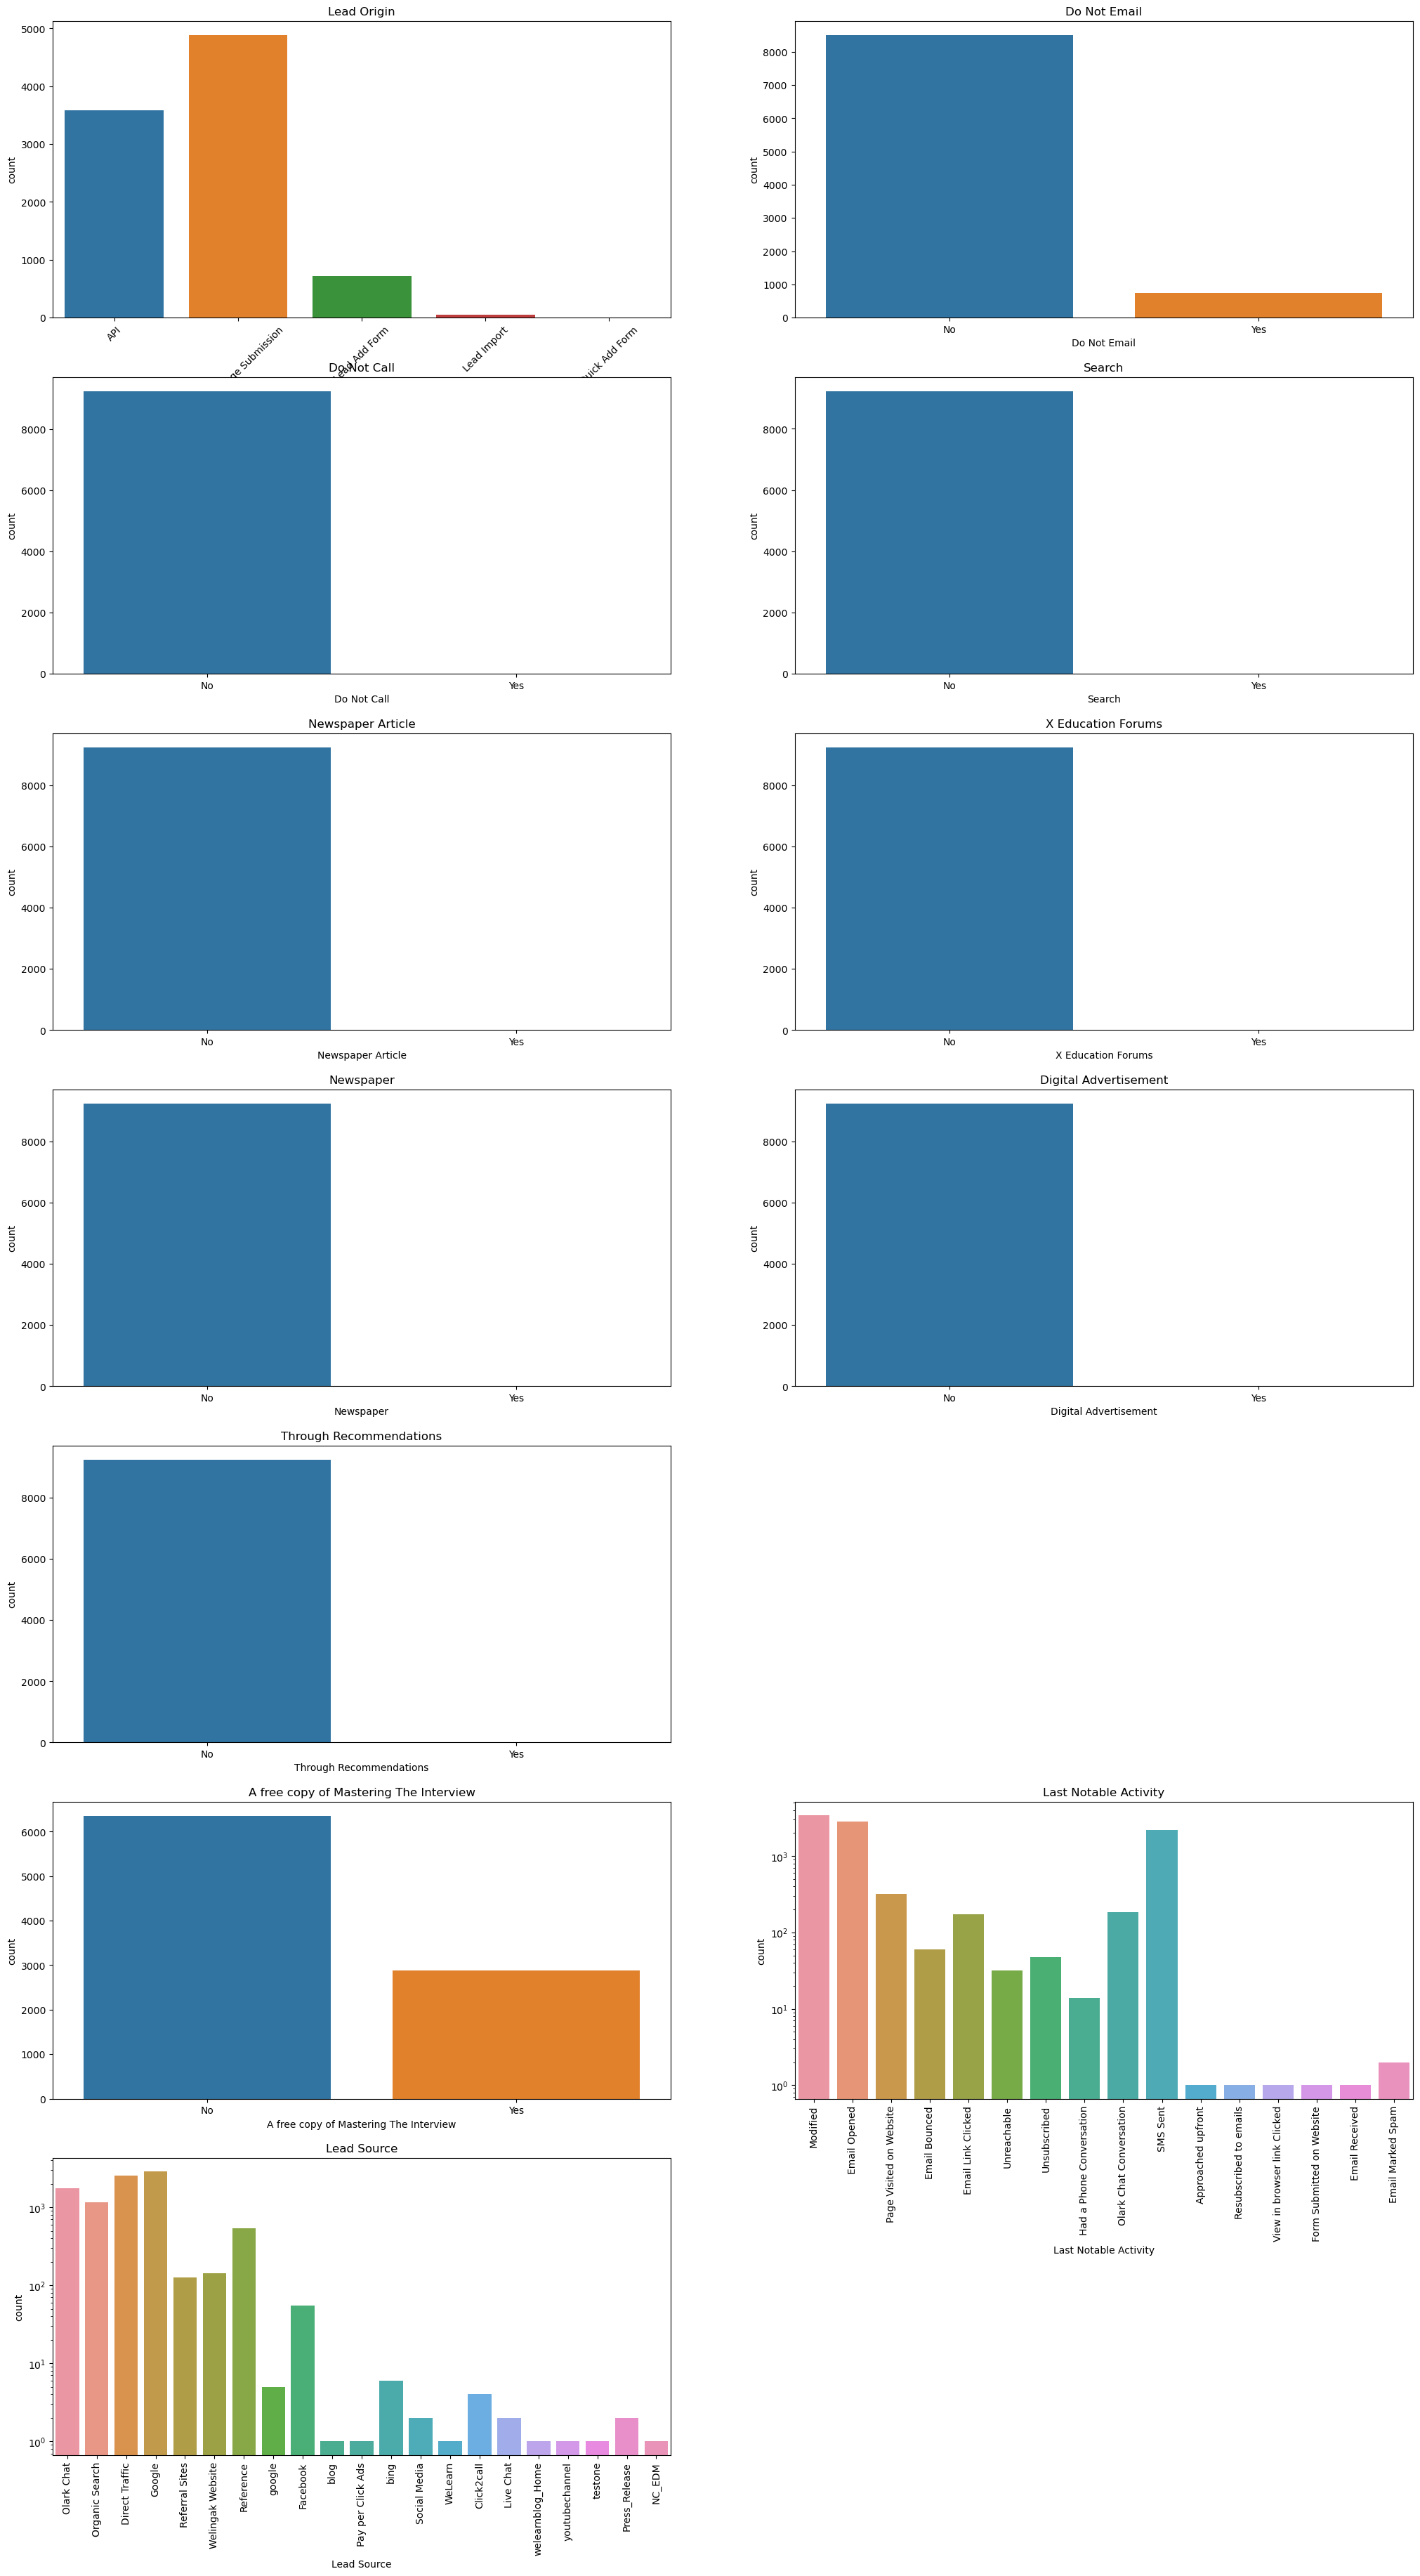

In [16]:
plt.figure(figsize = (25,45))

plt.subplot(7,2,1)
sns.countplot(x='Lead Origin',data =df).tick_params(axis='x', rotation = 45)
plt.title('Lead Origin')

plt.subplot(7,2,2)
sns.countplot(data =df,x='Do Not Email')
plt.title('Do Not Email')

plt.subplot(7,2,3)
sns.countplot(data = df, x='Do Not Call')
plt.title('Do Not Call')

plt.subplot(7,2,4)
sns.countplot(data = df, x='Search')
plt.title('Search')

plt.subplot(7,2,5)
sns.countplot(data = df, x='Newspaper Article')
plt.title('Newspaper Article')

plt.subplot(7,2,6)
sns.countplot(data = df,x='X Education Forums')
plt.title('X Education Forums')

plt.subplot(7,2,7)
sns.countplot(data = df, x='Newspaper')
plt.title('Newspaper')

plt.subplot(7,2,8)
sns.countplot(data= df,x='Digital Advertisement')
plt.title('Digital Advertisement')

plt.subplot(7,2,9)
sns.countplot(data = df, x='Through Recommendations')
plt.title('Through Recommendations')

plt.subplot(7,2,11)
sns.countplot(data= df, x='A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview')

plt.subplot(7,2,12)
sns.countplot(data = df, x='Last Notable Activity').tick_params(axis='x', rotation = 90)
plt.yscale("log")
plt.title('Last Notable Activity')

plt.subplot(7,2,13)
plt.yscale("log")
sns.countplot(data = df, x='Lead Source').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

    We can clearly observe that As per the value counts of categorical variables we can observe few columns 
    in which only one   value is given .Thse columns are Search , Magazine , Do not call , Newspaper Article ,
    X Education Forums ,Newspaper,Digital Advertisement ,Through Recommendations, Receive More Updates About 
    Our Courses ,Update me on Supply Chain Content ,Get updates on DM Content,I agree to pay the amount through 
    cheque.So they can be dropped.


1. Lead origin - Landing page submission has the highest value followed by API.
2. Do not email - More than 90 % have opted that they dont want emails regarding any courses. 
3. Lead source - Most of the lead source was from Google , Olark , Reference , Direct traffic and Organic search 
4. Last Activity - Most of the customers contribution was in SMS sent and email opened.


## Columns like Tags, country , city have lot of NaN value so these columns can also be dropped. 

In [17]:
df["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [18]:
df["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [19]:
df["City"].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
# Dropping Tags , Country ,City
df = df.drop(['Tags','Country','City'], axis = 1)

# Bivariate Analysis

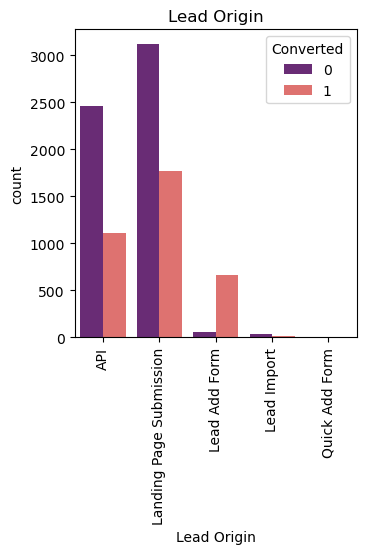

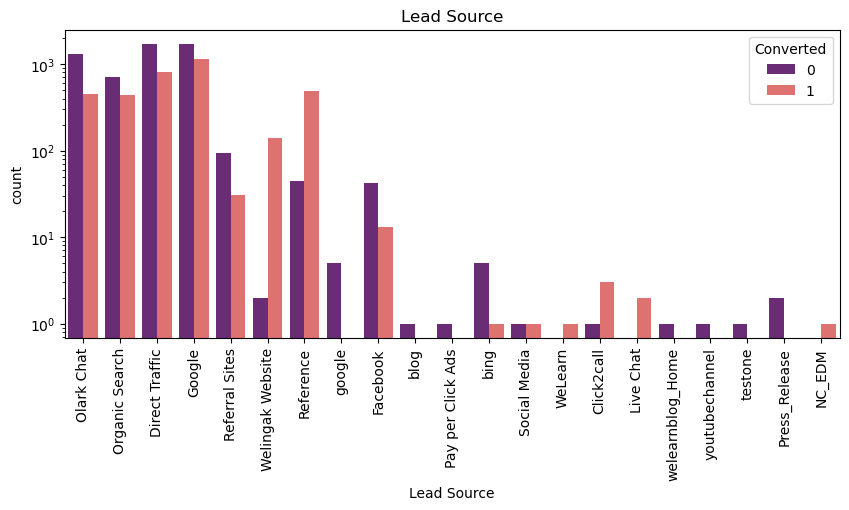

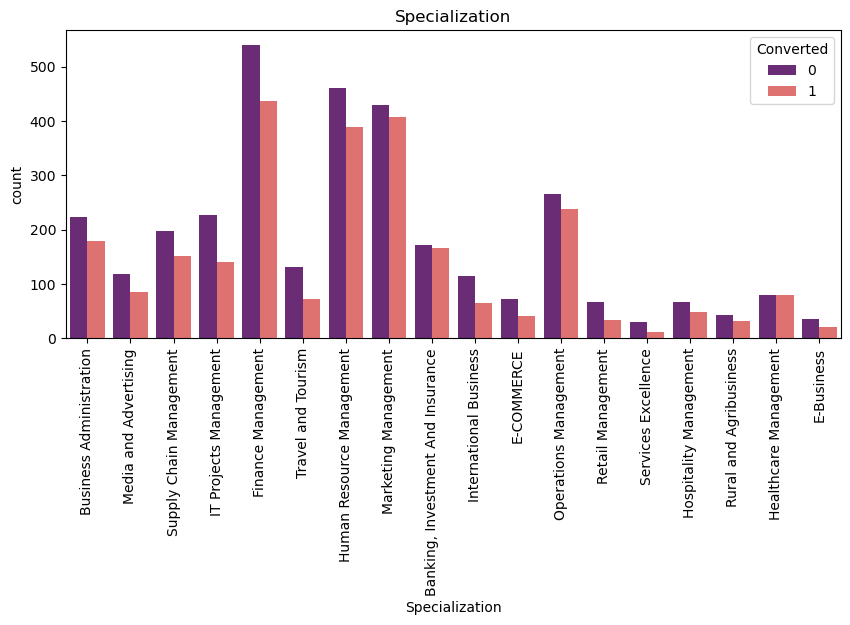

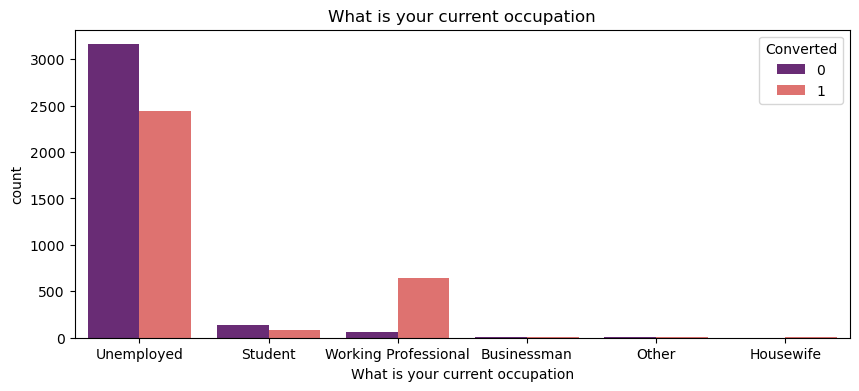

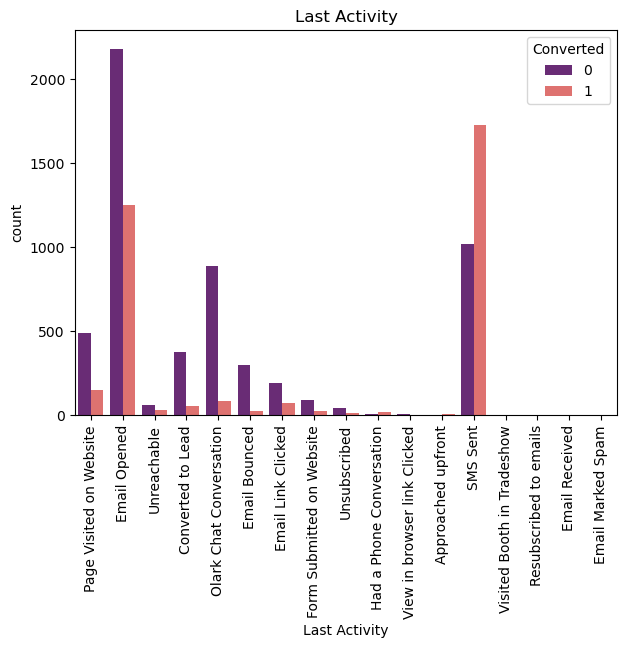

In [21]:
# bivariate analysis 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(x="Lead Origin",hue="Converted",data = df,palette='magma')
plt.xticks(rotation = 90)
plt.title("Lead Origin")


plt.figure(figsize=(10,4))
sns.countplot(x="Lead Source",hue="Converted",data = df,palette='magma')
plt.xticks(rotation = 90)
plt.yscale("log")
plt.title("Lead Source")


plt.figure(figsize=(10,4))
sns.countplot(x="Specialization",hue="Converted",data = df,palette='magma')
plt.xticks(rotation=90)
plt.title("Specialization")

plt.figure(figsize=(10,4))
sns.countplot(x="What is your current occupation",hue="Converted",data = df,palette='magma')
plt.title("What is your current occupation")


plt.figure(figsize=(7,5))
sns.countplot(x="Last Activity",hue="Converted",data = df,palette='magma')
plt.title("Last Activity")
plt.xticks(rotation=90)

plt.show()

1. Lead Origin - More than 50 % of all leads orginated from "Landing Page Submission" and they only have more conversion rate followed by API. 

2. Lead Source - More conversion rate can be seen in 
    a) Olark 
    b) Organic 
    c) Direct 
    d) Google 
    e) Refrence 
    f) Welingak website
    
3. Specialization - 
    a) Finance 
    b) HR
    c) Management Marketing
    d) Operation management
    
4. What is your current occupation 
    a) Working professionals have huge conversion rate. 
    
5. Last Activity - SMS sent has high conversion rate. 
    

In [22]:
# lets again check the percentage of null values 
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [23]:
# there are few columns who have values select in them 

In [24]:
#Let's get the value counts for all the categorical columns

for column in df:
    print(df[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

As per the value counts of categorical variables we can observe few columns in which only one value is given .Thse columns are Search , Magazine  , Do not call , Newspaper Article ,X Education Forums ,Newspaper,Digital Advertisement ,Through Recommendations, Receive More Updates About Our Courses ,Update me on Supply Chain Content ,Get updates on DM Content,I agree to pay the amount through cheque.  
so they can be dropped.
             

In [25]:
# Dropping above mentioned columns 
df = df.drop(["Do Not Call","Search", 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',],axis = 1)

In [26]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [27]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Since it has only only on major value of better career prospects as 6528 so it can be dropped.


In [28]:
# Dropping What matters most to you in choosing a course
df = df.drop(["What matters most to you in choosing a course"],axis = 1)

In [29]:
df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [30]:
df.shape

(9240, 14)

# Treating null values

In [31]:
# column -What is your current occupation
df["What is your current occupation"].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
# Replacing nan by mode 
df["What is your current occupation"] = df["What is your current occupation"].fillna(df["What is your current occupation"].mode()[0])

In [33]:
100* df["What is your current occupation"].value_counts(normalize=True)

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

Replacing Housweife , Businessman & Other by others as they have very low percentage so combining them together.

In [34]:
df["What is your current occupation"]=df["What is your current occupation"].replace(["Housewife","Businessman","Other"],"others")

In [35]:
100* df["What is your current occupation"].value_counts(normalize=True)

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
others                   0.367965
Name: What is your current occupation, dtype: float64

In [36]:
# Column - last activit 
100* df["Last Activity"].value_counts(normalize=True)

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

Replacing "Form Submitted on Website","Unreachable","Unsubscribed","Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received",
"Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails by others as the values of these columns are very less. 

In [37]:
df["Last Activity"] = df["Last Activity"].replace(["Form Submitted on Website","Unreachable","Unsubscribed","Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received",
"Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"],"Others")

In [38]:
df["Last Activity"].value_counts(dropna=False)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Email Bounced               326
Others                      321
Email Link Clicked          267
NaN                         103
Name: Last Activity, dtype: int64

Replacing NaN by mode 

In [39]:
df["Last Activity"] = df["Last Activity"].fillna(df["Last Activity"].mode()[0])

In [40]:
df["Last Activity"].value_counts(dropna=False)

Email Opened               3540
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Email Bounced               326
Others                      321
Email Link Clicked          267
Name: Last Activity, dtype: int64

In [41]:
# Column -Specialization 
df["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [42]:
# Replacing nan by not mentioned 
df["Specialization"] = df["Specialization"].replace(np.NaN,"not mentioned")

In [43]:
100*df["Specialization"].value_counts(normalize=True)

not mentioned                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

##### Replacing Rural and Agribusiness","E-Business","Services Excellence" by others as their percentage is quite low.

In [44]:
df["Specialization"]=df["Specialization"].replace(["Rural and Agribusiness","E-Business","Services Excellence"],"others")

In [45]:
100*df["Specialization"].value_counts(normalize=True)

not mentioned                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
others                                1.839827
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Name: Specialization, dtype: float64

In [46]:
# column - Page Views Per Visit,since its a continuous variable replacing nan buu median 
df["Page Views Per Visit"] = df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median())

In [47]:
# column - TotalVisits,since its a continuous variable replacing nan buu median 
df["TotalVisits"] = df["TotalVisits"].fillna(df["TotalVisits"].median())

In [48]:
# checking null values 
df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               36
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                             0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [49]:
# Still left with lead source 
100*df["Lead Source"].value_counts(normalize=True)

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [50]:
# since there are two values for google and Google so combining them 
df["Lead Source"]  = df["Lead Source"].replace("google","Google")

In [51]:
100*df["Lead Source"].value_counts(normalize=True)

Google               31.214689
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
Click2call            0.043459
Social Media          0.021730
Live Chat             0.021730
Press_Release         0.021730
Pay per Click Ads     0.010865
blog                  0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
testone               0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [52]:
# Replacing rows whose values are very less by others
df["Lead Source"]  = df["Lead Source"].replace(["Welingak Website","Referral Sites","Facebook","bing","Click2call","Social Media","Live Chat","Press_Release",        
"Pay per Click Ads","blog","WeLearn","welearnblog_Home","youtubechannel","testone","NC_EDM"],"Others")

In [53]:
100*df["Lead Source"].value_counts(dropna=False)

Google            287300
Direct Traffic    254300
Olark Chat        175500
Organic Search    115400
Reference          53400
Others             34500
NaN                 3600
Name: Lead Source, dtype: int64

In [54]:
# Replacing Nan by mode
df["Lead Source"] = df["Lead Source"].fillna(df["Lead Source"].mode()[0])

In [55]:
100*df["Lead Source"].value_counts(dropna=False)

Google            290900
Direct Traffic    254300
Olark Chat        175500
Organic Search    115400
Reference          53400
Others             34500
Name: Lead Source, dtype: int64

In [56]:
#Checking null values again 
df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [57]:
# Checkinh shape 
df.shape

(9240, 14)

##  Numerical variables
    1.TotalVisits
    2.Total Time Spent on Website
    3.Page Views Per Visit
    
    Plotting boxplot to see outliers

Text(0.5, 1.0, 'Page Views Per Visit')

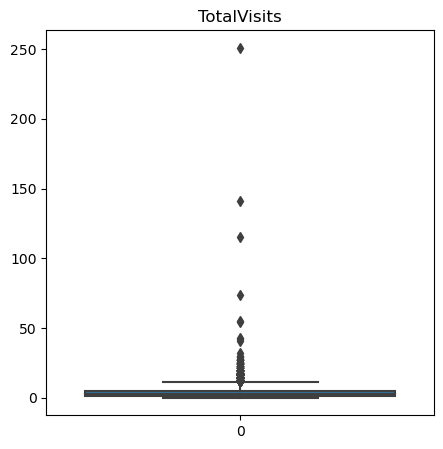

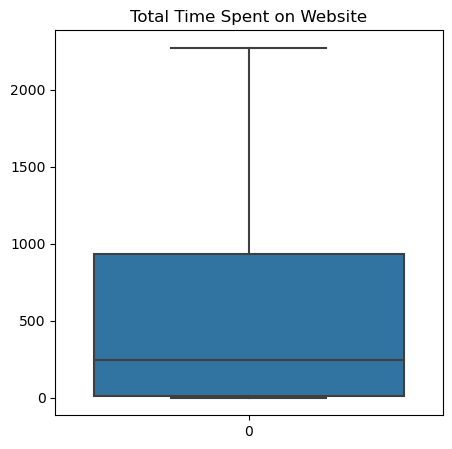

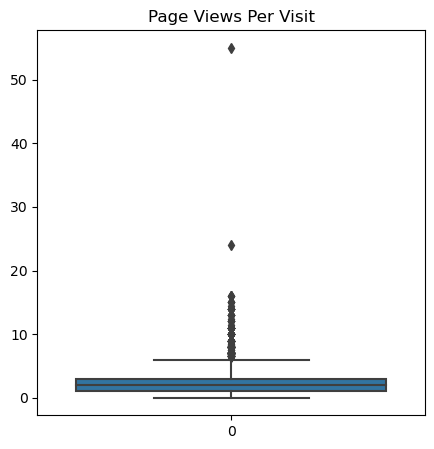

In [58]:
plt.figure(figsize=[5,5])
sns.boxplot(data = df['TotalVisits'])
plt.title('TotalVisits')

plt.figure(figsize=[5,5])
sns.boxplot(data = df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')


plt.figure(figsize=[5,5])
sns.boxplot(data = df['Page Views Per Visit'])
plt.title('Page Views Per Visit')



## Observations 
       a) We can see outliers in  TotalVists  and page per view visit.

In [59]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9240.000000                  9240.000000   
mean   617188.435606     0.385390     3.438636                   487.698268   
std     23405.995698     0.486714     4.819024                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

We can observe from the box plot and describe method that there are outliers in TotalVisits and 
Page Views Per Visit. So the need to be handelled.

In [60]:
# Checking outliers
numeric = df[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]
numeric.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.438636                   487.698268              2.357440
std       4.819024                   548.021466              2.145781
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

In [61]:
#Creating function for outlier treatment 
# capping 
def outlier_cap(df,outlier_col):
    for i in outlier_col:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        upper_limit = Q3+1.5*IQR
        lower_limit = Q1-1.5*IQR
        df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

In [62]:
outlier_col = ['TotalVisits','Page Views Per Visit']
outlier_cap(df,outlier_col)

Text(0.5, 1.0, 'Page Views Per Visit')

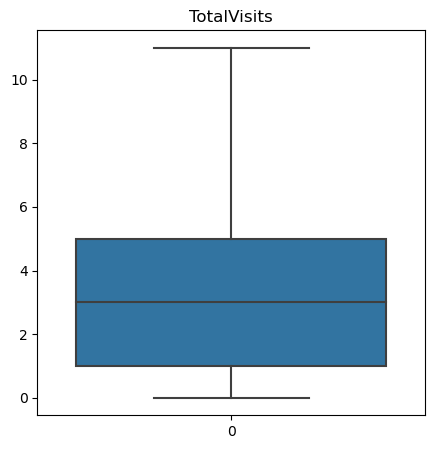

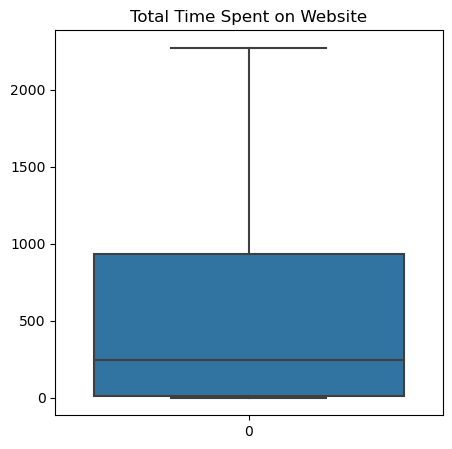

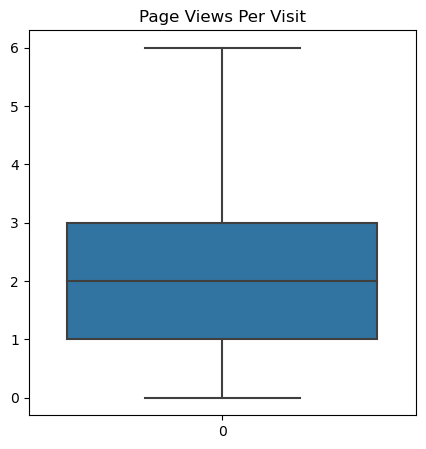

In [63]:
plt.figure(figsize=[5,5])
sns.boxplot(data = df['TotalVisits'])
plt.title('TotalVisits')

plt.figure(figsize=[5,5])
sns.boxplot(data = df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')


plt.figure(figsize=[5,5])
sns.boxplot(data = df['Page Views Per Visit'])
plt.title('Page Views Per Visit')



We can clearly observe that we have removed outliers 

# Preparing Data for Modelling

In [64]:
### Bivariate analysis for Numerical columns 

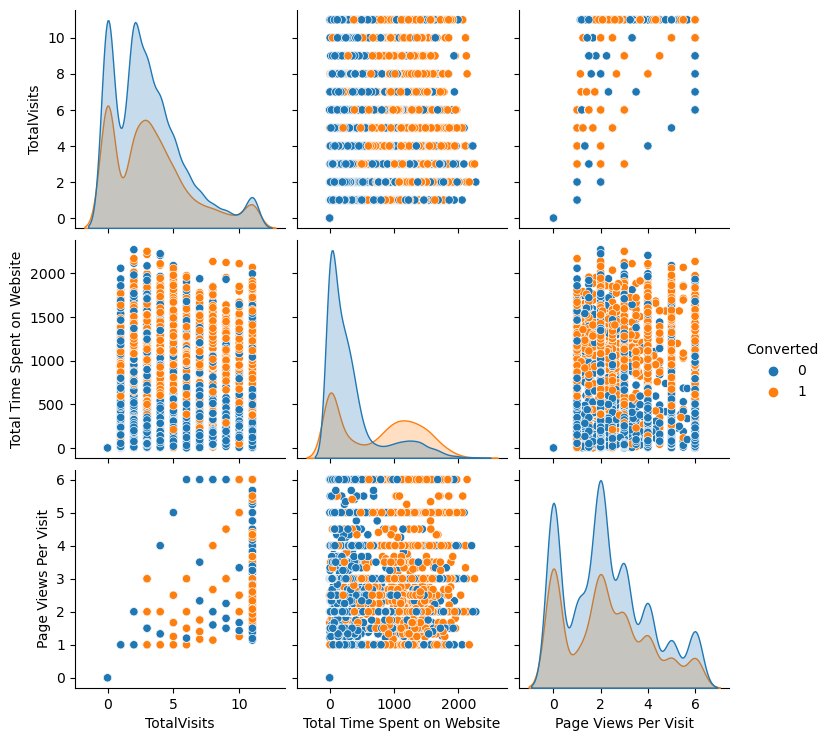

In [65]:
df1 = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(df1,diag_kind='kde',hue='Converted')
plt.show()

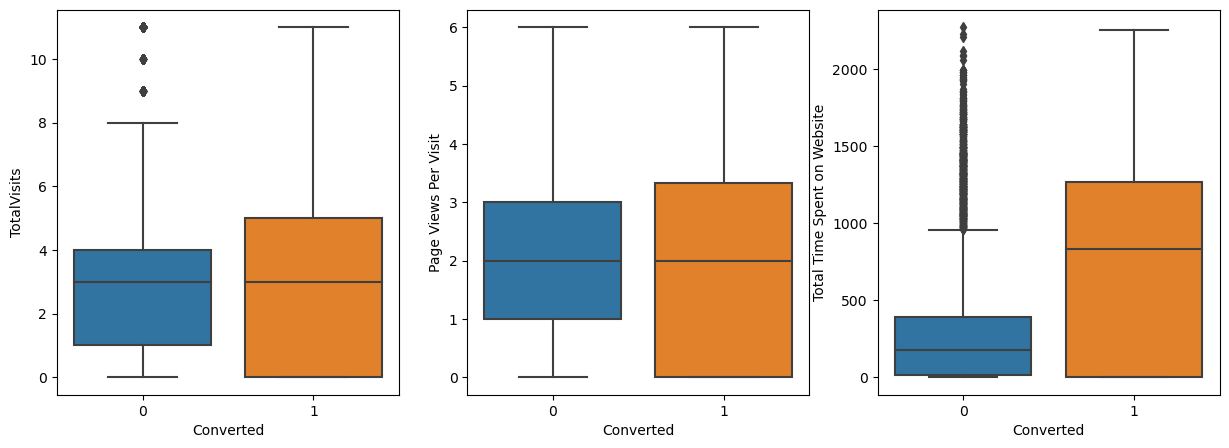

In [66]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

### OBSERVATION - Past leads who spend more time on website are successfully converted than those who spend less as seen in the boxplot.

# Creating dummy variables

Next step is to deal with categorical variable.Let's find out the number of categorical variable. 

In [67]:
# Let's check the columns which are of type object.
df_cat = df.loc[:,df.dtypes=="object"]
df_cat.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
df['Do Not Email'] = df["Do Not Email"].map({'Yes':1,'No':0})
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [69]:
# Creating a dummy variable
dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity",
                           "What is your current occupation",
                          "Last Notable Activity"]],drop_first = True)
# adding the result to main dataframe 
df = pd.concat([df,dummy],axis=1)

In [70]:
#Dummy variable for specialization is created seperatly and it 
#has select in it with large value so dropping it. 
dummy_spcl = pd.get_dummies(df["Specialization"],prefix="Specialization")
dummy_spcl = dummy_spcl.drop(["Specialization_not mentioned"],axis=1)
df = pd.concat([df,dummy_spcl],axis=1)

In [71]:
#Lets drop the variables for which the dummy variables have been created
df = df.drop(["Lead Origin","Lead Source","Last Activity","Specialization",
              "What is your current occupation",
             "Last Notable Activity"],axis=1)

In [72]:
df.shape

(9240, 58)

In [73]:
df = df.drop(["Prospect ID","Lead Number"],axis = 1)

In [74]:
df.shape

(9240, 56)

# Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Dropping target column
X = df.drop(["Converted"],axis=1) 
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Last Activity_Email Bounced  \
0                      0                            0   
1                      0                            0   
2                      0                            0   
3                      0                            0   
4                      0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Work

In [77]:
y = df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
#splitting the data into train and test
X_train, X_test ,y_train ,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [79]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (6468, 55)
X_test (2772, 55)
y_train (6468,)
y_test (2772,)


# Feature Scaling

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0     0.000000                     0.000000   
6795             0     0.363636                     0.214349   
3516             0     0.454545                     0.046655   
8105             0     0.454545                     0.541373   
3934             0     0.000000                     0.000000   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871              0.000000                                       0   
6795              0.221667                                       1   
3516              0.416667                                       0   
8105              0.833333                                       0   
3934              0.000000                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
1871                        0                           0                   0   
6795                        0                           0                   0   
3516                        0                           0                   0   
8105                        0                           0                   1   
3934                        0                           0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Last Activity_Email Bounced  \
1871                      0                            0   
6795                      0                            0   
3516                      0                            0   
8105                      0                            0   
3934                      0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   
3934                                 0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105                                      0                     0   
3934                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871                                      0                       0   
6795                                      0                       0   
3516                                      0                       0   
8105                                      0                       1   
3934                                      0                       0   

      What is your current occupation_Unemployed  \
1871                                           1   
6795                                           1   
3516               

In [81]:
X_train.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count   6468.000000  6468.000000                  6468.000000   
mean       0.078386     0.292025                     0.212974   
std        0.268799     0.260221                     0.240566   
min        0.000000     0.000000                     0.000000   
25%        0.000000     0.090909                     0.005282   
50%        0.000000     0.272727                     0.108275   
75%        0.000000     0.454545                     0.407790   
max        1.000000     1.000000                     1.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           6468.000000                             6468.000000   
mean               0.374255                                0.311843   
std                0.295485                                0.463282   
min                0.000000                                0.000000   
25%                0.166667                                0.000000   
50%                0.333333                                0.000000   
75%                0.500000                                1.000000   
max                1.000000                                1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6468.000000                6468.000000   
mean                              0.528139                   0.079468   
std                               0.499246                   0.270489   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count              6468.000000                 6468.000000   
mean                  0.005102                    0.000155   
std                   0.071252                    0.012434   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
count         6468.000000             6468.000000                 6468.000000   
mean             0.320810                0.190167                    0.121058   
std              0.466824                0.392463                    0.326219   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%              1.000000                0.000000                    0.000000   
max              1.000000                1.000000                    1.000000   

       Lead Source_Others  Lead Source_Reference  Last Activity_Email Bounced  \
count         6468.000000            6468.000000                  6468.000000   
mean             0.036178               0.060297                     0.036333   
std              0.186748               0.238054                     0.187131   
min              0.000000               0.000000                     0.000000   
25%              0.000000               0.000000                     0.000000   
50%              0.000000               0.000000                     0.000000   
75%              0.000000               0.000000                     0.000000   
max              1.000000               1.000000                     1.000000   

       Last Activity_Email Link Clicked  Last Activity_Email Opened  \
count                       6468.

# Looking at correlations 
    Since number of variables are quite high so lets use heat map to see correlations.

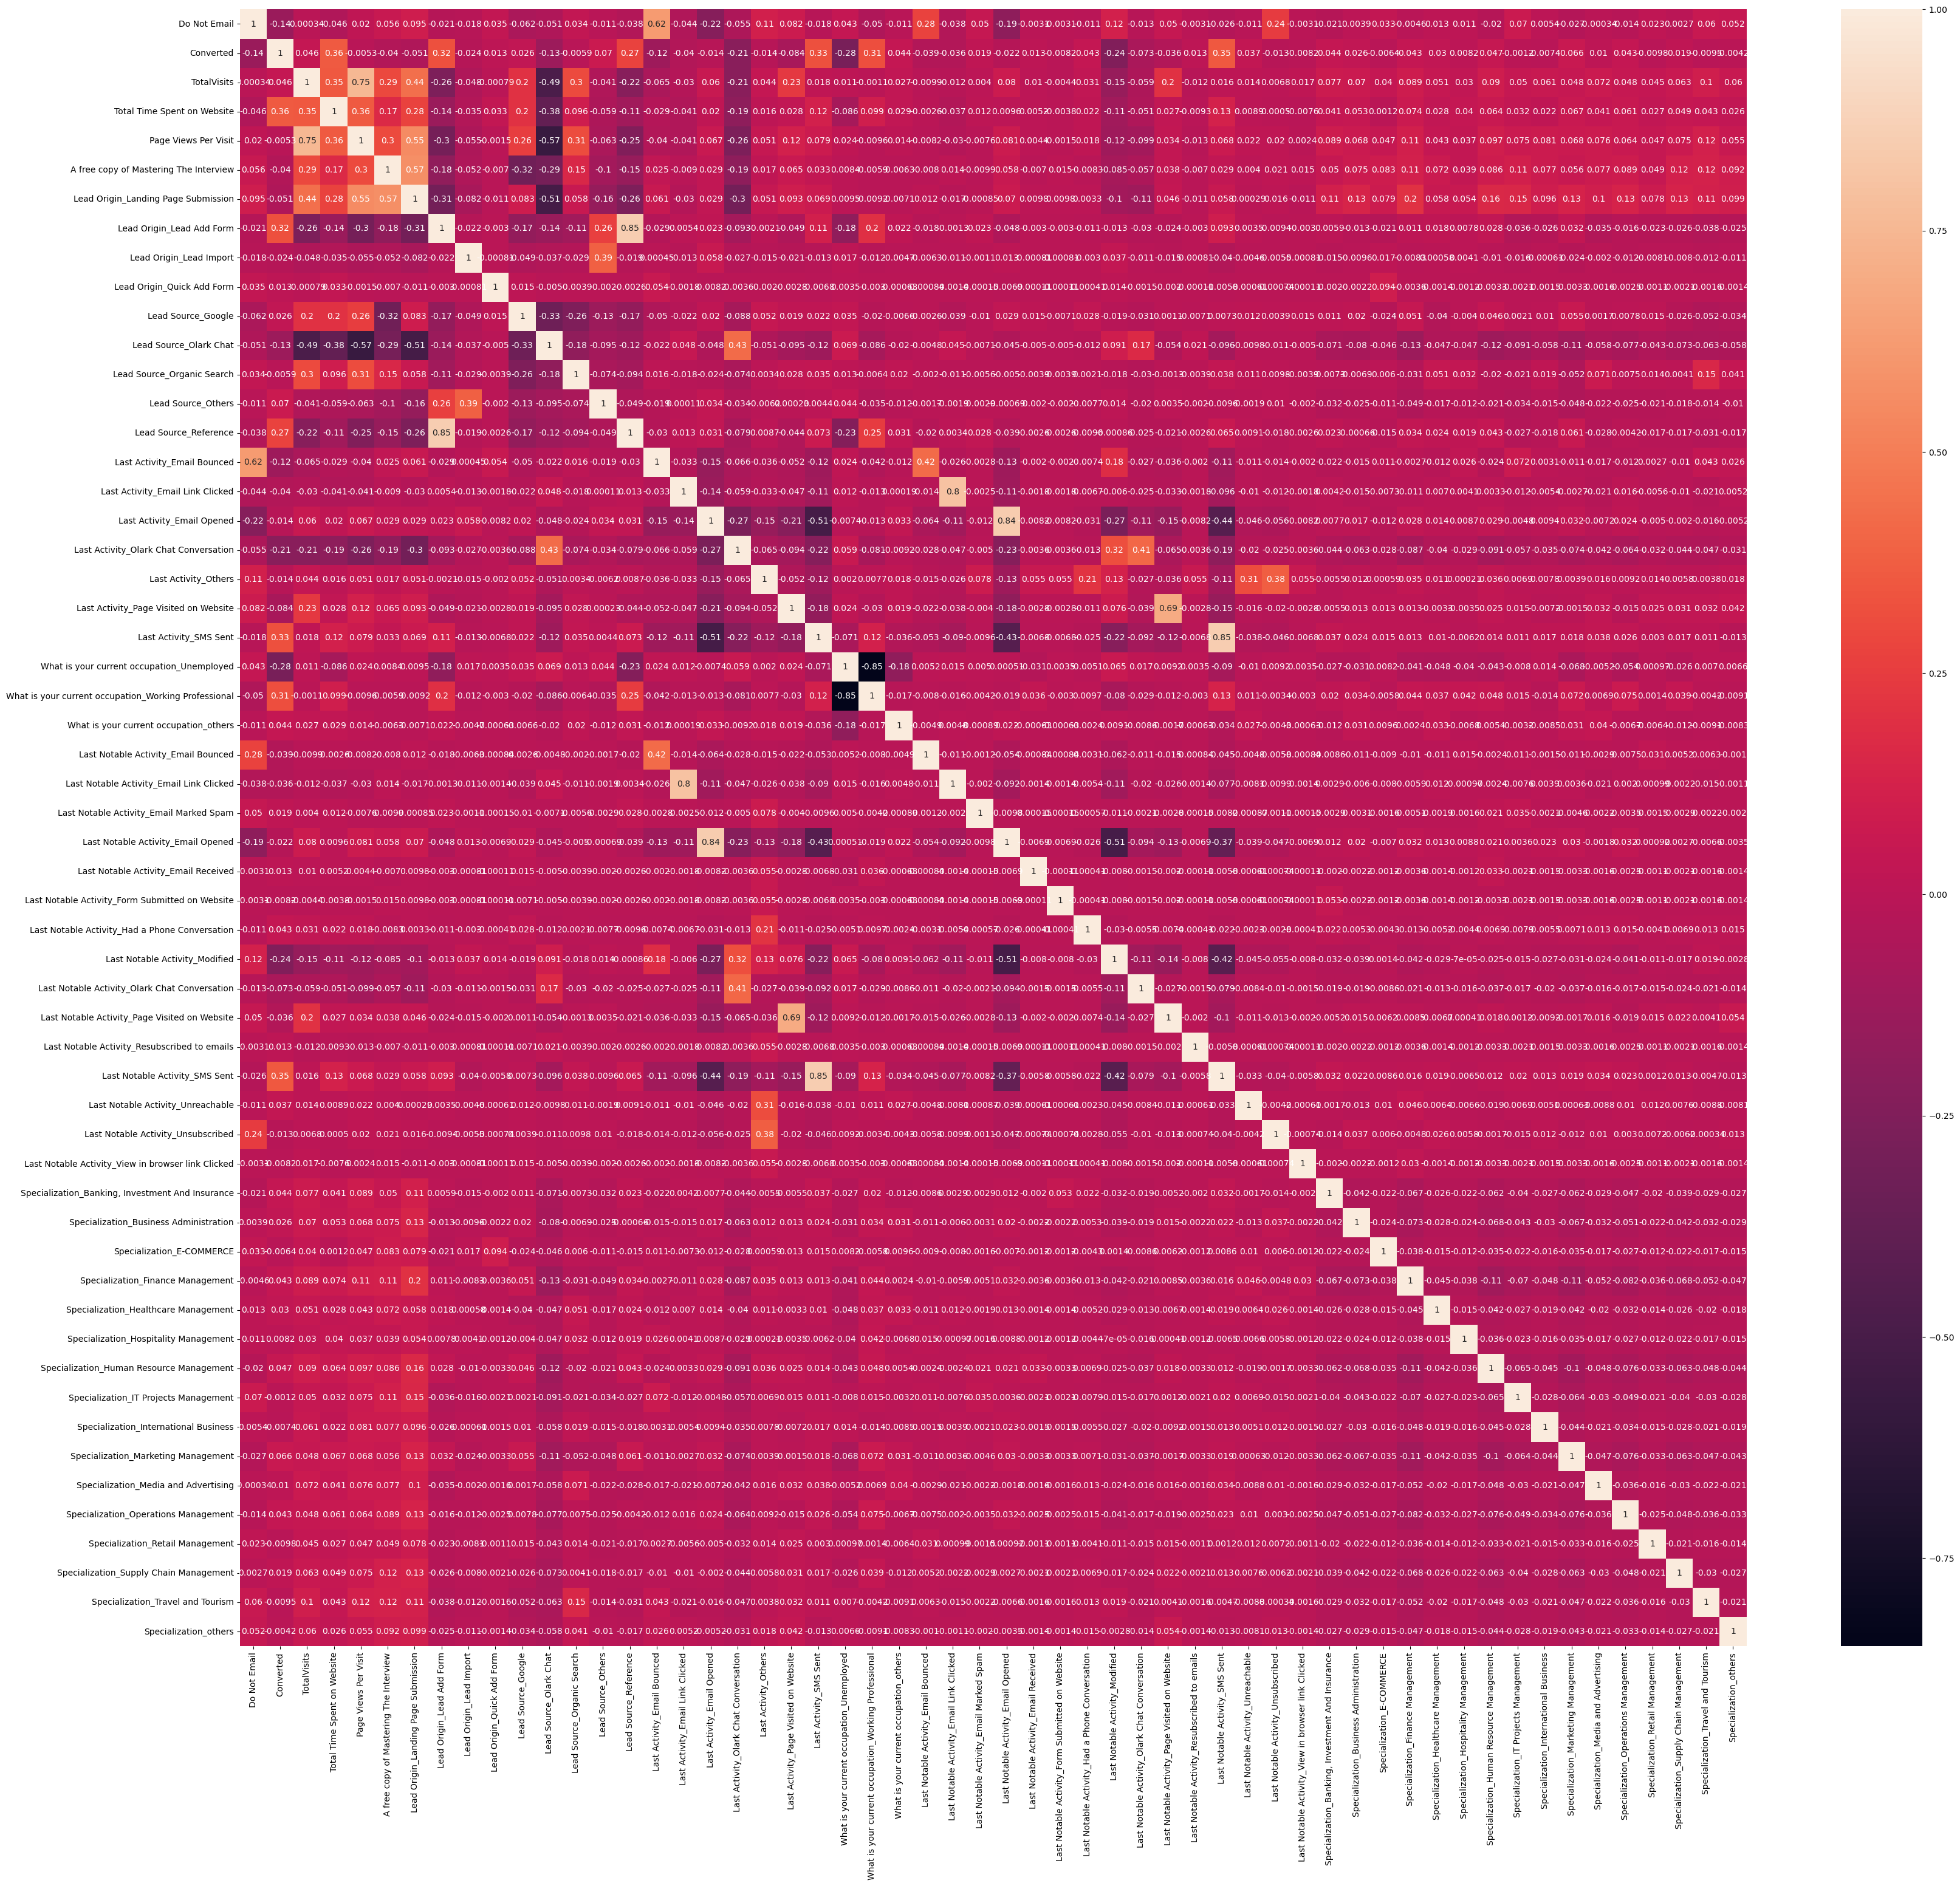

In [82]:
plt.figure(figsize=(40,35))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [83]:
df.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.135580   
Converted                                              -0.135580   1.000000   
TotalVisits                                             0.000337   0.046238   
Total Time Spent on Website                            -0.046374   0.362483   
Page Views Per Visit                                    0.019670  -0.005289   
A free copy of Mastering The Interview                  0.055762  -0.039820   
Lead Origin_Landing Page Submission                     0.095304  -0.051236   
Lead Origin_Lead Add Form                              -0.020983   0.321702   
Lead Origin_Lead Import                                -0.017529  -0.023695   
Lead Origin_Quick Add Form                              0.035416   0.013138   
Lead Source_Google                                     -0.062113   0.026286   
Lead Source_Olark Chat                                 -0.051436  -0.129459   
Lead Source_Organic Search                              0.034295  -0.005879   
Lead Source_Others                                     -0.011411   0.070423   
Lead Source_Reference                                  -0.038451   0.270830   
Last Activity_Email Bounced                             0.618470  -0.120095   
Last Activity_Email Link Clicked                       -0.043505  -0.039690   
Last Activity_Email Opened                             -0.224090  -0.013850   
Last Activity_Olark Chat Conversation                  -0.055143  -0.210809   
Last Activity_Others                                    0.105998  -0.014220   
Last Activity_Page Visited on Website                   0.082217  -0.083771   
Last Activity_SMS Sent                                 -0.017564   0.325600   
What is your current occupation_Unemployed              0.042780  -0.281065   
What is your current occupation_Working Profess...     -0.049841   0.313837   
What is your current occupation_others                 -0.011242   0.043692   
Last Notable Activity_Email Bounced                     0.275213  -0.039101   
Last Notable Activity_Email Link Clicked               -0.037624  -0.035555   
Last Notable Activity_Email Marked Spam                 0.050089   0.018581   
Last Notable Activity_Email Opened                     -0.188089  -0.021955   
Last Notable Activity_Email Received                   -0.003056   0.013138   
Last Notable Activity_Form Submitted on Website        -0.003056  -0.008238   
Last Notable Activity_Had a Phone Conversation         -0.011443   0.043476   
Last Notable Activity_Modified                          0.117259  -0.244294   
Last Notable Activity_Olark Chat Conversation          -0.013032  -0.072660   
Last Notable Activity_Page Visited on Website           0.049921  -0.036051   
Last Notable Activity_Resubscribed to emails           -0.003056   0.013138   
Last Notable Activity_SMS Sent                         -0.025990   0.351845   
Last Notable Activity_Unreachable                      -0.010505   0.036594   
Last Notable Activity_Unsubscribed                      0.243408  -0.012858   
Last Notable Activity_View in browser link Clicked     -0.003056  -0.008238   
Specialization_Banking, Investment And Insurance       -0.020998   0.043518   
Specialization_Business Administration                  0.003893   0.025791   
Specialization_E-COMMERCE                               0.033293  -0.006429   
Specialization_Finance Management                      -0.004597   0.043308   
Specialization_Healthcare Management                    0.013447   0.030306   
Specialization_Hospitality Management                   0.010674   0.008190   
Specialization_Human Resource Management               -0.019910   0.047130   
Specialization_IT Projects Management                   0.069613  -0.001200   
Specialization_International Business                   0.005416  -0.007441   
Specialization_Marketing Management                    -0.027271   0.065853   
Specialization_Media an

## Correlations between numerical columns 

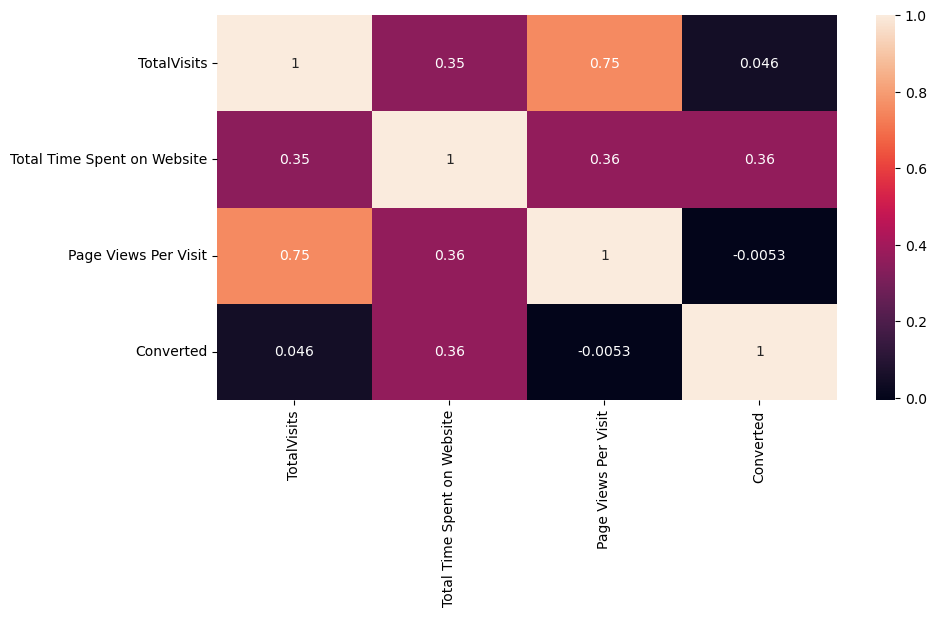

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [85]:
# lead conversion rate
Lcr = (sum(df['Converted'])/len(df['Converted'].index))*100
Lcr

38.53896103896104

Conversion rate is 38.53% means 38.53 % people have converted into leads out of 100

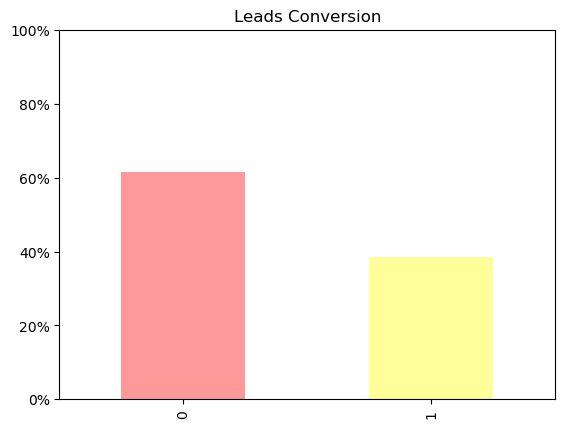

In [86]:
graph = (100 * df["Converted"].value_counts(normalize=True)).plot.bar(color = ["Red","Yellow"],alpha =0.4)
plt.title("Leads Conversion")
# modification ticks y axis
ticks = np.arange(0,101,20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)
plt.show()


# Model Building 

In [87]:
# Importing stats model 

In [88]:
import statsmodels.api as sm 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Nov 2023   Deviance:                   2.2713e+05
Time:                        23:13:01   Pearson chi2:                 1.11e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -5.614e+14   1.17e+07  -4.79e+07      0.000   -5.61e+14   -5.61e+14
Do Not Email                                          2.358e+14   4.34e+06   5.43e+07      0.000    2.36e+14    2.36e+14
TotalVisits                                          -1.002e+15   4.65e+06  -2.15e+08      0.000      -1e+15      -1e+15
Total Time Spent on Website                           2.736e+15   3.37e+06   8.12e+08      0.000    2.74e+15    2.74e+15
Page Views Per Visit                                  6.332e+14   2.54e+06    2.5e+08      0.000    6.33e+14    6.33e+14
A free copy of Mastering The Interview                9.019e+14   1.06e+06   8.48e+08      0.000    9.02e+14    9.02e+14
Lead Origin_Landing Page Submission                  -3.617e+14   3.19e+06  -1.13e+08      0.000   -3.62e+14   -3.62e+14
Lead Origin_Lead Add Form                              2.73e+15   7.77e+06   3.51e+08      0.000    2.73e+15    2.73e+15
Lead Origin_Lead Import                               1.747e+15   1.31e+07   1.33e+08      0.000    1.75e+15    1.75e+15
Lead Origin_Quick Add Form                            4.422e+15   6.78e+07   6.52e+07      0.000    4.42e+15    4.42e+15
Lead Source_Google                                   -1.761e+14   8.47e+05  -2.08e+08      0.000   -1.76e+14   -1.76e+14
Lead Source_Olark Chat                                6.666e+12   3.18e+06    2.1e+06      0.000    6.67e+12    6.67e+12
Lead Source_Organic Search                           -4.852e+14    2.7e+06   -1.8e+08      0.000   -4.85e+14   -4.85e+14
Lead Source_Others                                   -1.611e+15   6.07e+06  -2.66e+08      0.000   -1.61e+15   -1.61e+15
Lead Source_Reference                                -1.818e+15   8.58e+06  -2.12e+08      0.000   -1.82e+15   -1.82e+15
Last Activity_Email Bounced                          -1.026e+15   7.44e+06  -1.38e+08      0.000   -1.03e+15   -1.03e+15
Last Activity_Email Link Clicked                      6.925e+14   9.31e+06   7.44e+07      0.000    6.92e+14    6.92e+14
Last Activity_Email Opened                            4.232e+14   5.06e+06   8.36e+07      0.000    4.23e+14    4.23e+14
Last Activity_Olark Chat Conversation                 3.188e+14   5.17e+06   6.17e+07      0.000    3.19e+14    3.19e+14
Last Activity_Others                                  3.604e+14   6.84e+06   5.27e+07      0.000     3.6e+14     3.6e+14
Last Activity_Page Visited on Website                 3.704e+14   5.98e+06    6.2e+07      0.000     3.7e+14     3.7e+14
Last Activity_SMS Sent                                3.125e+14    5.2e+06   6.01e+07      0.000    3.12e+14    3.12e+14
What is your current occupation_Unemployed             6.9

Since there are lot of features its better to use RFE aproach to get important variables. 

In [89]:
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()
from sklearn.feature_selection import RFE
# selecting top 15 features
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 27),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', False, 17),
 ('Last Activity_Email Bounced', False, 25),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 37),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Unemployed', False, 16),
 ('What is your current occupation_Working Professional', 

In [91]:
col = X_train.columns[rfe.support_]

In [92]:
X_train_sm =sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.8
Date:                Mon, 20 Nov 2023   Deviance:                       5341.7
Time:                        23:13:06   Pearson chi2:                 7.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5264      0.151    -16.746      0.000      -2.822      -2.231
Do Not Email                                            -1.1041      0.172     -6.422      0.000      -1.441      -0.767
TotalVisits                                              1.2534      0.195      6.432      0.000       0.871       1.635
Total Time Spent on Website                              4.5607      0.165     27.604      0.000       4.237       4.884
Page Views Per Visit                                    -1.0245      0.196     -5.235      0.000      -1.408      -0.641
Lead Origin_Lead Add Form                                3.8921      0.196     19.849      0.000       3.508       4.276
Lead Source_Olark Chat                                   1.0686      0.126      8.463      0.000       0.821       1.316
Last Activity_Email Opened                               1.1163      0.157      7.116      0.000       0.809       1.424
Last Activity_Others                                     0.8684      0.233      3.730      0.000       0.412       1.325
Last Activity_SMS Sent                                   1.6683      0.116     14.437      0.000       1.442       1.895
What is your current occupation_Working Professional     2.8325      0.190     14.886      0.000       2.460       3.205
Last Notable Activity_Email Opened                      -0.7649      0.174     -4.388      0.000      -1.107      -0.423
Last Notable Activity_Had a Phone Conversation           2.8009      1.130      2.479      0.013       0.586       5.016
Last Notable Activity_Modified                          -1.1048      0.109    -10.131      0.000      -1.319      -0.891
Last Notable Activity_Olark Chat Conversation           -1.0807      0.344     -3.140      0.002      -1.755      -0.406
Last Notable Activity_Unreachable                        1.0593      0.560      1.893      0.058      -0.038       2.156
========================================================================================================================
"""

In [93]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                Page Views Per Visit  7.21
6                          Last Activity_Email Opened  7.09
10                 Last Notable Activity_Email Opened  6.88
1                                         TotalVisits  5.17
12                     Last Notable Activity_Modified  2.25
8                              Last Activity_SMS Sent  2.18
2                         Total Time Spent on Website  2.16
5                              Lead Source_Olark Chat  1.73
4                           Lead Origin_Lead Add Form  1.40
7                                Last Activity_Others  1.30
9   What is your current occupation_Working Profes...  1.16
0                                        Do Not Email  1.14
14                  Last Notable Activity_Unreachable  1.13
13      Last Notable Activity_Olark Chat Conversation  1.12
11     Last Notable Activity_Had a Phone Conversation  1.07

In [94]:
# Dropping Last Notable Activity_Unreachable as p = 0.058
col = col.drop('Last Notable Activity_Unreachable', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [95]:
X_train_sm =sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.6
Date:                Mon, 20 Nov 2023   Deviance:                       5345.3
Time:                        23:13:07   Pearson chi2:                 7.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5015      0.150    -16.664      0.000      -2.796      -2.207
Do Not Email                                            -1.1293      0.172     -6.577      0.000      -1.466      -0.793
TotalVisits                                              1.2488      0.195      6.416      0.000       0.867       1.630
Total Time Spent on Website                              4.5509      0.165     27.582      0.000       4.228       4.874
Page Views Per Visit                                    -1.0174      0.195     -5.205      0.000      -1.401      -0.634
Lead Origin_Lead Add Form                                3.8908      0.196     19.841      0.000       3.506       4.275
Lead Source_Olark Chat                                   1.0676      0.126      8.458      0.000       0.820       1.315
Last Activity_Email Opened                               1.1252      0.157      7.174      0.000       0.818       1.433
Last Activity_Others                                     1.0292      0.213      4.834      0.000       0.612       1.446
Last Activity_SMS Sent                                   1.6524      0.115     14.344      0.000       1.427       1.878
What is your current occupation_Working Professional     2.8281      0.190     14.872      0.000       2.455       3.201
Last Notable Activity_Email Opened                      -0.7972      0.173     -4.596      0.000      -1.137      -0.457
Last Notable Activity_Had a Phone Conversation           2.6147      1.125      2.325      0.020       0.410       4.819
Last Notable Activity_Modified                          -1.1368      0.108    -10.549      0.000      -1.348      -0.926
Last Notable Activity_Olark Chat Conversation           -1.1024      0.344     -3.207      0.001      -1.776      -0.429
========================================================================================================================
"""

In [96]:
# Importing Variance inflatiion factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                Page Views Per Visit  7.20
6                          Last Activity_Email Opened  7.09
10                 Last Notable Activity_Email Opened  6.86
1                                         TotalVisits  5.17
12                     Last Notable Activity_Modified  2.22
8                              Last Activity_SMS Sent  2.17
2                         Total Time Spent on Website  2.16
5                              Lead Source_Olark Chat  1.73
4                           Lead Origin_Lead Add Form  1.40
7                                Last Activity_Others  1.17
9   What is your current occupation_Working Profes...  1.16
0                                        Do Not Email  1.14
13      Last Notable Activity_Olark Chat Conversation  1.12
11     Last Notable Activity_Had a Phone Conversation  1.06

In [97]:
# Since page per view visit has vif = 7.20 we are dropping it
col = col.drop('Page Views Per Visit', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [98]:
X_train_sm =sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.4
Date:                Mon, 20 Nov 2023   Deviance:                       5372.7
Time:                        23:13:07   Pearson chi2:                 7.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7059      0.145    -18.617      0.000      -2.991      -2.421
Do Not Email                                            -1.1473      0.171     -6.703      0.000      -1.483      -0.812
TotalVisits                                              0.6846      0.162      4.220      0.000       0.367       1.003
Total Time Spent on Website                              4.5220      0.164     27.492      0.000       4.200       4.844
Lead Origin_Lead Add Form                                4.1523      0.190     21.820      0.000       3.779       4.525
Lead Source_Olark Chat                                   1.3333      0.116     11.446      0.000       1.105       1.562
Last Activity_Email Opened                               1.0694      0.156      6.847      0.000       0.763       1.375
Last Activity_Others                                     0.9728      0.213      4.562      0.000       0.555       1.391
Last Activity_SMS Sent                                   1.5510      0.113     13.727      0.000       1.330       1.772
What is your current occupation_Working Professional     2.8094      0.190     14.812      0.000       2.438       3.181
Last Notable Activity_Email Opened                      -0.8186      0.173     -4.724      0.000      -1.158      -0.479
Last Notable Activity_Had a Phone Conversation           2.6008      1.115      2.332      0.020       0.415       4.786
Last Notable Activity_Modified                          -1.1601      0.107    -10.801      0.000      -1.371      -0.950
Last Notable Activity_Olark Chat Conversation           -1.1268      0.342     -3.292      0.001      -1.798      -0.456
========================================================================================================================
"""

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                          Last Activity_Email Opened  7.02
9                  Last Notable Activity_Email Opened  6.70
1                                         TotalVisits  2.72
2                         Total Time Spent on Website  2.14
11                     Last Notable Activity_Modified  2.01
7                              Last Activity_SMS Sent  1.83
4                              Lead Source_Olark Chat  1.56
3                           Lead Origin_Lead Add Form  1.31
6                                Last Activity_Others  1.17
8   What is your current occupation_Working Profes...  1.16
0                                        Do Not Email  1.13
12      Last Notable Activity_Olark Chat Conversation  1.11
10     Last Notable Activity_Had a Phone Conversation  1.06

In [100]:
# Since last_activity_email opend has high vif ie 7.02 , dropping it 
col = col.drop('Last Activity_Email Opened', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [101]:
X_train_sm =sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.1
Date:                Mon, 20 Nov 2023   Deviance:                       5418.2
Time:                        23:13:07   Pearson chi2:                 7.30e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5228      0.140    -18.015      0.000      -2.797      -2.248
Do Not Email                                            -1.2676      0.169     -7.497      0.000      -1.599      -0.936
TotalVisits                                              0.6769      0.161      4.201      0.000       0.361       0.993
Total Time Spent on Website                              4.5452      0.164     27.750      0.000       4.224       4.866
Lead Origin_Lead Add Form                                4.2705      0.190     22.474      0.000       3.898       4.643
Lead Source_Olark Chat                                   1.3077      0.116     11.300      0.000       1.081       1.535
Last Activity_Others                                     0.7008      0.208      3.365      0.001       0.293       1.109
Last Activity_SMS Sent                                   1.3382      0.106     12.642      0.000       1.131       1.546
What is your current occupation_Working Professional     2.8104      0.189     14.858      0.000       2.440       3.181
Last Notable Activity_Email Opened                       0.0653      0.118      0.552      0.581      -0.166       0.297
Last Notable Activity_Had a Phone Conversation           2.6912      1.115      2.413      0.016       0.506       4.877
Last Notable Activity_Modified                          -1.0022      0.103     -9.727      0.000      -1.204      -0.800
Last Notable Activity_Olark Chat Conversation           -1.2948      0.341     -3.794      0.000      -1.964      -0.626
========================================================================================================================
"""

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                         TotalVisits  2.69
2                         Total Time Spent on Website  2.11
8                  Last Notable Activity_Email Opened  1.92
10                     Last Notable Activity_Modified  1.78
6                              Last Activity_SMS Sent  1.75
4                              Lead Source_Olark Chat  1.55
3                           Lead Origin_Lead Add Form  1.26
7   What is your current occupation_Working Profes...  1.16
5                                Last Activity_Others  1.14
0                                        Do Not Email  1.11
11      Last Notable Activity_Olark Chat Conversation  1.11
9      Last Notable Activity_Had a Phone Conversation  1.06

In [103]:
# Last Notable Activity_Email Opened has high p value hence dropping it 
col = col.drop('Last Notable Activity_Email Opened', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [104]:
X_train_sm =sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.3
Date:                Mon, 20 Nov 2023   Deviance:                       5418.5
Time:                        23:13:08   Pearson chi2:                 7.30e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4690      0.100    -24.596      0.000      -2.666      -2.272
Do Not Email                                            -1.2826      0.167     -7.686      0.000      -1.610      -0.956
TotalVisits                                              0.6693      0.160      4.171      0.000       0.355       0.984
Total Time Spent on Website                              4.5456      0.164     27.754      0.000       4.225       4.867
Lead Origin_Lead Add Form                                4.2687      0.190     22.472      0.000       3.896       4.641
Lead Source_Olark Chat                                   1.3022      0.115     11.299      0.000       1.076       1.528
Last Activity_Others                                     0.6789      0.204      3.320      0.001       0.278       1.080
Last Activity_SMS Sent                                   1.2963      0.074     17.595      0.000       1.152       1.441
What is your current occupation_Working Professional     2.8080      0.189     14.858      0.000       2.438       3.178
Last Notable Activity_Had a Phone Conversation           2.6633      1.114      2.391      0.017       0.480       4.847
Last Notable Activity_Modified                          -1.0391      0.078    -13.242      0.000      -1.193      -0.885
Last Notable Activity_Olark Chat Conversation           -1.3428      0.330     -4.070      0.000      -1.989      -0.696
========================================================================================================================
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                         TotalVisits  2.02
2                         Total Time Spent on Website  1.97
9                      Last Notable Activity_Modified  1.50
6                              Last Activity_SMS Sent  1.44
4                              Lead Source_Olark Chat  1.25
3                           Lead Origin_Lead Add Form  1.17
7   What is your current occupation_Working Profes...  1.16
5                                Last Activity_Others  1.13
0                                        Do Not Email  1.11
10      Last Notable Activity_Olark Chat Conversation  1.07
8      Last Notable Activity_Had a Phone Conversation  1.06

# Model Evaluation 

Since Vif values are below 5  and p values are not more than 0.05 so variables seems to be decent enough for the model.Let's go ahead and make the predictions.

In [106]:
# Predicting the probabilities on the train set 
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.237427
6795    0.222479
3516    0.342871
8105    0.830948
3934    0.099219
4844    0.992488
3297    0.133193
8071    0.994014
987     0.139832
7423    0.894438
dtype: float64

In [107]:
#Reshaping to an array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23742749, 0.2224786 , 0.342871  , 0.83094778, 0.09921901,
       0.9924882 , 0.13319275, 0.99401411, 0.13983152, 0.89443802])

### Creating dataframe with the actual conversion flag and the predicted probabilities

In [108]:
#Dataframe with probability of predicted ones and given conversion rate
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final["Prospect ID"] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID
0          0         0.237427         1871
1          0         0.222479         6795
2          0         0.342871         3516
3          0         0.830948         8105
4          0         0.099219         3934

In [109]:
#Substituting 0 and 1 by taking cutoff as 0.5 - 1 if value is more than 0.5 else 0 
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted
0          0         0.237427         1871          0
1          0         0.222479         6795          0
2          0         0.342871         3516          0
3          0         0.830948         8105          1
4          0         0.099219         3934          0

## Confusion matrix

In [110]:
#Importing metrics from sklearn for evaluation 
from sklearn import metrics

In [111]:
#Accuracy 
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.814935064935065

In [112]:
# Creating confusion metrics 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3551,  451],
       [ 746, 1720]], dtype=int64)

In [113]:
# predicted      no         yes
# actual        
# no            1920        392
# yes           568         1581

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.6974858069748581
Specificity : 0.8873063468265867


In [116]:
print ("positive predictive value:",TP / float(TP+FP))

positive predictive value: 0.7922616305849839


In [117]:
# Negative predictive value
print ("negative predictive value" ,TN / float(TN+ FN))

negative predictive value 0.8263905050034908


In [118]:
precision  = TP/float(TP+FP)
print("Precision =",precision*100)
recall  = TP/float(TP+FN)
print("Recall = ", recall *100)

Precision = 79.22616305849839
Recall =  69.7485806974858


# ROC 

1. ROC curve shows the tradeoff between sensitivity and specificity. They both are inversely proportional.
2. The closure the curve follows the left hand border and then the top border of the ROC space, the more accurate the test.
3. The closure the curve comes to the 45 degree diagonal of the ROC space the less accurate the test.

Now 0.5 is an arbitary cutoff  but in order to get good model we to optimize threshold. so let's plot ROC to see AUC

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

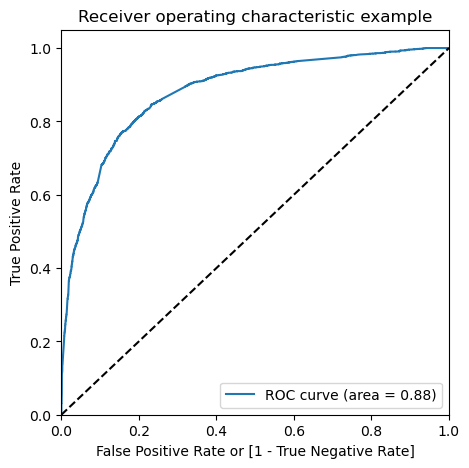

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

The area under the curve is 0.88 which is quite good.Lets find the optimal cutoff

In [121]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          0         0.237427         1871          0    1    1    1    0   
1          0         0.222479         6795          0    1    1    1    0   
2          0         0.342871         3516          0    1    1    1    1   
3          0         0.830948         8105          1    1    1    1    1   
4          0         0.099219         3934          0    1    0    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    1    1    1    1    1    0  
4    0    0    0    0    0    0

In [122]:
# Creating dataframe to see values of specificity , sensitivity , accuracy 
cutoff_df = pd.DataFrame(columns = ["prob","accuracy","sensi","speci"])
#making confusion matrix 
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci =cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.610080  0.964315  0.391804
0.2   0.2  0.741960  0.909570  0.638681
0.3   0.3  0.800866  0.830089  0.782859
0.4   0.4  0.816017  0.767234  0.846077
0.5   0.5  0.814935  0.697486  0.887306
0.6   0.6  0.798547  0.594485  0.924288
0.7   0.7  0.782622  0.516626  0.946527
0.8   0.8  0.765152  0.431873  0.970515
0.9   0.9  0.708411  0.252230  0.989505

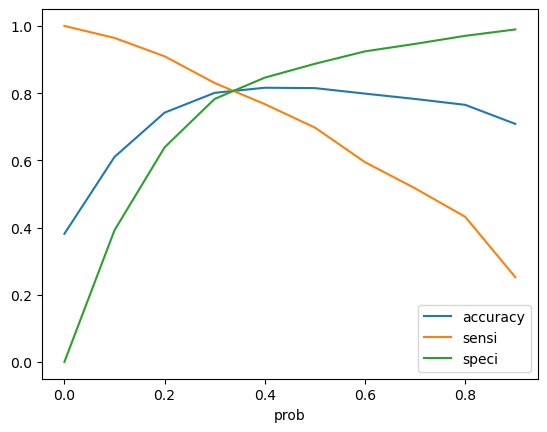

In [123]:
# plotting 
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

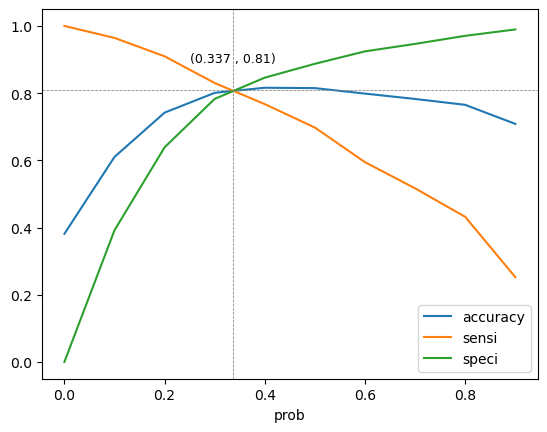

In [124]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

So the optimal cutoff is 0.337. Now lets perform analysis with 0.337 cutoff.

In [125]:
y_train_pred_final["final_predicted"] = y_train_pred_final.Conversion_Prob.map(lambda x:1 if x >0.337 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          0         0.237427         1871          0    1    1    1    0   
1          0         0.222479         6795          0    1    1    1    0   
2          0         0.342871         3516          0    1    1    1    1   
3          0         0.830948         8105          1    1    1    1    1   
4          0         0.099219         3934          0    1    0    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                1  
3    1    1    1    1    1    0                1  
4    0    0    0    0    0    0                0

In [126]:
#checking overall accuracy 
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.807204700061843

In [127]:
# confusion metrics 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[3239,  763],
       [ 484, 1982]], dtype=int64)

In [128]:
#True positive 
TP = confusion2[1,1]
#True negative 
TN = confusion2[0,0]
#False Positive 
FP = confusion2[0,1]
# False negative 
FN = confusion2[1,0]

In [129]:
print("Sensitivity :",100* TP / float(TP+FN))
print("Specificity :",100* TN / float(TN+FP))

Sensitivity : 80.37307380373073
Specificity : 80.93453273363318


In [130]:
precision  = TP/float(TP+FP)
print("Precision =",precision*100)
recall  = TP/float(TP+FN)
print("Recall = ", recall *100)

Precision = 72.2040072859745
Recall =  80.37307380373075


# Precision Recall tradeoff

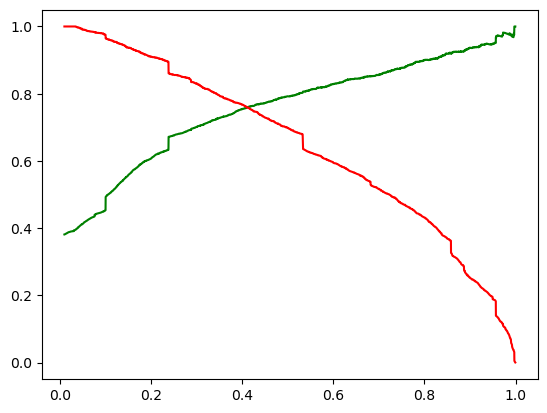

In [131]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted , y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [132]:
#Copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()


In [133]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Conversion_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          0         0.237427         1871          0    1    1    1    0   
1          0         0.222479         6795          0    1    1    1    0   
2          0         0.342871         3516          0    1    1    1    1   
3          0         0.830948         8105          1    1    1    1    1   
4          0         0.099219         3934          0    1    0    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  precision_recall_prediction  
0    0    0    0    0    0    0                0                            0  
1    0    0    0    0    0    0                0                            0  
2    0    0    0    0    0    0                1                            0  
3    1    1    1    1    1    0                1                            1  
4    0    0    0    0    0    0                0                            0

In [134]:
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])

In [135]:
confusion_matrix

array([[3409,  593],
       [ 593, 1873]], dtype=int64)

In [136]:
#True positive 
TP = confusion_matrix[1,1]
#True negative 
TN = confusion_matrix[0,0]
#False Positive 
FP = confusion_matrix[0,1]
# False negative 
FN = confusion_matrix[1,0]

In [137]:
precision  = TP/float(TP+FP)
print("Precision =",precision*100)
recall  = TP/float(TP+FN)
print("Recall = ", recall *100)

Precision = 75.9529602595296
Recall =  75.9529602595296


In [138]:
y_train_pred_final["Lead Score"] = y_train_pred_final["Conversion_Prob"].map(lambda x : round(x*100))
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          0         0.237427         1871          0    1    1    1    0   
1          0         0.222479         6795          0    1    1    1    0   
2          0         0.342871         3516          0    1    1    1    1   
3          0         0.830948         8105          1    1    1    1    1   
4          0         0.099219         3934          0    1    0    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  Lead Score  
0    0    0    0    0    0    0                0          24  
1    0    0    0    0    0    0                0          22  
2    0    0    0    0    0    0                1          34  
3    1    1    1    1    1    0                1          83  
4    0    0    0    0    0    0                0          10

A higher score means lead will convert 

# Making predictions on Test set

In [139]:
#Scaling Numeric columns 
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [140]:
X_test =X_test[col]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0     0.727273                     0.444982   
2376             0     0.000000                     0.000000   
7766             0     0.454545                     0.025968   
9199             0     0.000000                     0.000000   
4359             0     0.000000                     0.000000   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  Last Activity_Others  \
4269                          0                       0                     0   
2376                          1                       0                     0   
7766                          0                       0                     1   
9199                          0                       1                     0   
4359                          1                       0                     0   

      Last Activity_SMS Sent  \
4269                       1   
2376                       1   
7766                       0   
9199                       0   
4359                       0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_Modified  \
4269                               0   
2376                               0   
7766                               0   
9199                               1   
4359                               0   

      Last Notable Activity_Olark Chat Conversation  
4269                                              0  
2376                                              0  
7766                                              0  
9199                                              0  
4359                                              0

In [141]:
#Adding constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  Do Not Email  TotalVisits  Total Time Spent on Website  \
4269    1.0             0     0.727273                     0.444982   
2376    1.0             0     0.000000                     0.000000   
7766    1.0             0     0.454545                     0.025968   
9199    1.0             0     0.000000                     0.000000   
4359    1.0             0     0.000000                     0.000000   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  Last Activity_Others  \
4269                          0                       0                     0   
2376                          1                       0                     0   
7766                          0                       0                     1   
9199                          0                       1                     0   
4359                          1                       0                     0   

      Last Activity_SMS Sent  \
4269                       1   
2376                       1   
7766                       0   
9199                       0   
4359                       0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_Modified  \
4269                               0   
2376                               0   
7766                               0   
9199                               1   
4359                               0   

      Last Notable Activity_Olark Chat Conversation  
4269                                              0  
2376                                              0  
7766                                              0  
9199                                              0  
4359                                              0

In [142]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [143]:
# making prediction usin final model as res
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.791955
2376    0.956725
7766    0.808494
9199    0.099219
4359    0.858110
9186    0.602711
1631    0.465538
8963    0.148012
8007    0.066775
5324    0.338479
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4269  0.791955
2376  0.956725
7766  0.808494
9199  0.099219
4359  0.858110

In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
#putting prospect id to index 
y_test_df['Prospect ID'] = y_test_df.index
#removing index from both datafranes to append side by side
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)
#append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
#Renaming the columns 
y_pred_final = y_pred_final.rename(columns = {0:"Conversion_Prob"})
y_pred_final.head()

Converted  Prospect ID  Conversion_Prob
0          1         4269         0.791955
1          1         2376         0.956725
2          1         7766         0.808494
3          0         9199         0.099219
4          1         4359         0.858110

In [146]:
# Making predictions using cutoff as 0.337
y_pred_final["final_predicted"] = y_pred_final.Conversion_Prob.map(lambda x:1 if x > 0.337 else 0)
y_pred_final

Converted  Prospect ID  Conversion_Prob  final_predicted
0             1         4269         0.791955                1
1             1         2376         0.956725                1
2             1         7766         0.808494                1
3             0         9199         0.099219                0
4             1         4359         0.858110                1
...         ...          ...              ...              ...
2767          0         8649         0.228027                0
2768          1         2152         0.956725                1
2769          0         7101         0.237427                0
2770          0         5331         0.199242                0
2771          1         2960         0.956725                1

[2772 rows x 4 columns]

In [147]:
# checking overall accuracy 
metrics.accuracy_score(y_pred_final["Converted"],y_pred_final.final_predicted)


0.8102453102453102

In [148]:
# Creating confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final["Converted"],y_pred_final.final_predicted)
confusion3

array([[1365,  312],
       [ 214,  881]], dtype=int64)

In [149]:
#True positive 
TP = confusion3[1,1]
#True negative 
TN = confusion3[0,0]
#False Positive 
FP = confusion3[0,1]
# False negative 
FN = confusion3[1,0]

In [150]:
sensitivity = TP/float(TP+FN)
print("Sensitivity = ",sensitivity*100)
specificity = TN/float(TN+FP)
print("Specificity = ", specificity*100)

Sensitivity =  80.45662100456622
Specificity =  81.3953488372093


In [151]:
precision  = TP/float(TP+FP)
print("Precision =",precision*100)
recall  = TP/float(TP+FN)
print("Recall = ", recall *100)

Precision = 73.84744341994971
Recall =  80.45662100456622


In [152]:
# top features are 
# features and their coefficicent from final model
parameters = res.params.sort_values(ascending = False)
parameters

Total Time Spent on Website                             4.545584
Lead Origin_Lead Add Form                               4.268686
What is your current occupation_Working Professional    2.808038
Last Notable Activity_Had a Phone Conversation          2.663266
Lead Source_Olark Chat                                  1.302173
Last Activity_SMS Sent                                  1.296274
Last Activity_Others                                    0.678950
TotalVisits                                             0.669318
Last Notable Activity_Modified                         -1.039097
Do Not Email                                           -1.282595
Last Notable Activity_Olark Chat Conversation          -1.342796
const                                                  -2.469008
dtype: float64

# Adding lead score in Dataframe 

In [153]:
y_pred_final["Lead_Score"] = y_pred_final["Conversion_Prob"].map(lambda x: round(x*100))
y_pred_final.head()

Converted  Prospect ID  Conversion_Prob  final_predicted  Lead_Score
0          1         4269         0.791955                1          79
1          1         2376         0.956725                1          96
2          1         7766         0.808494                1          81
3          0         9199         0.099219                0          10
4          1         4359         0.858110                1          86

1. High lead_score means lead is hot that is most likely to convert.
2. Lower Lead_Score means lead is not likely to convert.


# Conclusion 
   ### Training Set 
    cut off = 0.337
   
    Sensitivity : 80.37 %
    Specificity : 80.93 %
    Accuracy =    80.72 %
    
   ### Test Set 
       Sensitivity =  80.46 %
       Specificity =  81.40 %
       Accuracy    =  81.02 %
       
   ### Training set 
        cut off = 0.41
        Precision = 72.20 %
        Recall =  80.37 %
        
   ### Test set 
        Precision = 73.84 %
         Recall =  80.45 %
       
       
       
       Sensitivity of train set is around 80.37 %  and 80.46 % for test set.
       Sensitivity in this case means how many leads the model identifies correctly out of all potential leads which 
       are converting. 
       
   ### Top three features are with their coefficents
        a) Total Time Spent on Website  -  4.545584
        b) Lead Origin_Lead Add Form - 4.268686
        c) What is your current occupation_Working Professional - 2.808038

# Summary
    Top three features are with their coefficents
    a) Total Time Spent on Website  -  4.545584
    b) Lead Origin_Lead Add Form - 4.268686
    c) What is your current occupation_Working Professional - 2.808038
   
    As these three columns are contributing more towards increasing the conversion rate. 
    Recommendations 
    1. We need to focus on employed or working professionals as they have higher chances of enrolling themselves. 
    2. We need to give briefing to leads as in what are the oppurtunities they will be getting after doing this particular 
       course and it will lead to their professional growth. 
    3. Use broadcast messages, emails to reach out to the maximum audience. 
    4. Do not focus on students as they are already involved in some courses. 
    5. Focus on features with positive coefficients for targeted marketing stratergies. 
    6. More budget can be spend on Olark chat as more leads are coming from their in terms of advertising. 
    7. Incentives or discounts for providing refrence that convert to lead. 
    8. The company should make calls who spend more time on website. 
    9. They should not make more calls to the leads who chose the option of Do not email as yes.
    10. More the number of visits to the website more are the chances of the lead conversion.